In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [84]:
df = pd.read_csv(r"C:\Users\Numaira\Desktop\Term deposit\Bank.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,46,blue-collar,married,basic.6y,unknown,yes,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,32,entrepreneur,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,38,admin.,single,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,55,technician,married,university.degree,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [85]:
print(df.shape)

(4120, 21)


In [86]:
df.y.unique()

array(['no', 'yes'], dtype=object)

In [87]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [88]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [89]:
df1 = df.drop(['pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],axis = 'columns')
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,y
0,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,312,1,no
1,46,blue-collar,married,basic.6y,unknown,yes,yes,telephone,may,mon,440,1,no
2,32,entrepreneur,married,high.school,no,yes,no,telephone,may,mon,314,1,no
3,38,admin.,single,professional.course,no,no,no,telephone,may,mon,160,1,no
4,55,technician,married,university.degree,no,no,no,telephone,may,mon,349,1,no


In [90]:
df2 = df1.drop(['month', 'day_of_week','job', 'marital'],axis='columns')
df2.head()

,age,education,default,housing,loan,contact,duration,campaign,y
0,35,basic.6y,no,yes,no,telephone,312,1,no
1,46,basic.6y,unknown,yes,yes,telephone,440,1,no
2,32,high.school,no,yes,no,telephone,314,1,no
3,38,professional.course,no,no,no,telephone,160,1,no
4,55,university.degree,no,no,no,telephone,349,1,no


In [91]:
df2['Output'] = df2['y'].apply(lambda x:1 if x=='yes' else 0)
df2['Default'] = df2['default'].apply(lambda x:1 if x=='yes' else 0)
df2['Housing'] = df2['housing'].apply(lambda x:1 if x=='yes' else 0)
df2['Loan'] = df2['loan'].apply(lambda x:1 if x=='yes' else 0)

In [92]:
df2.head()

,age,education,default,housing,loan,contact,duration,campaign,y,Output,Default,Housing,Loan
0,35,basic.6y,no,yes,no,telephone,312,1,no,0,0,1,0
1,46,basic.6y,unknown,yes,yes,telephone,440,1,no,0,0,1,1
2,32,high.school,no,yes,no,telephone,314,1,no,0,0,1,0
3,38,professional.course,no,no,no,telephone,160,1,no,0,0,0,0
4,55,university.degree,no,no,no,telephone,349,1,no,0,0,0,0


In [93]:
df2.Output.unique()

array([0, 1], dtype=int64)

In [94]:
df3 = df2.drop(['default','housing','loan','contact'],axis = 'columns')
df3.head()

,age,education,duration,campaign,y,Output,Default,Housing,Loan
0,35,basic.6y,312,1,no,0,0,1,0
1,46,basic.6y,440,1,no,0,0,1,1
2,32,high.school,314,1,no,0,0,1,0
3,38,professional.course,160,1,no,0,0,0,0
4,55,university.degree,349,1,no,0,0,0,0


In [95]:
df4 = df3.drop(['y'],axis='columns')
df4.head()

,age,education,duration,campaign,Output,Default,Housing,Loan
0,35,basic.6y,312,1,0,0,1,0
1,46,basic.6y,440,1,0,0,1,1
2,32,high.school,314,1,0,0,1,0
3,38,professional.course,160,1,0,0,0,0
4,55,university.degree,349,1,0,0,0,0


In [96]:
df4.Default.unique()

array([0, 1], dtype=int64)

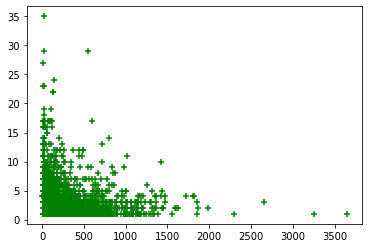

In [97]:
plt.scatter(df4.duration,df4.campaign,color='green',marker='+')

In [98]:
df4.shape

(4120, 8)

In [99]:
df5 = df4[df4.duration<=2000]
df5.head()

,age,education,duration,campaign,Output,Default,Housing,Loan
0,35,basic.6y,312,1,0,0,1,0
1,46,basic.6y,440,1,0,0,1,1
2,32,high.school,314,1,0,0,1,0
3,38,professional.course,160,1,0,0,0,0
4,55,university.degree,349,1,0,0,0,0


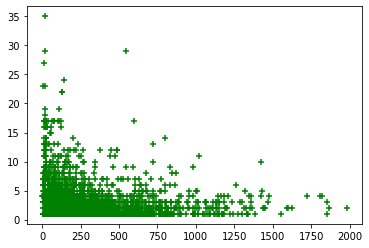

In [100]:
plt.scatter(df5.duration,df5.campaign,color='green',marker='+')

In [101]:
df5.Output.unique()

array([0, 1], dtype=int64)

In [102]:
dummies = pd.get_dummies(df5.education)
dummies.head()

,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0


In [103]:
df6 = pd.concat([df5,dummies],axis='columns')
df6.head()

,age,education,duration,campaign,Output,Default,Housing,Loan,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
0,35,basic.6y,312,1,0,0,1,0,0,1,0,0,0,0,0,0
1,46,basic.6y,440,1,0,0,1,1,0,1,0,0,0,0,0,0
2,32,high.school,314,1,0,0,1,0,0,0,0,1,0,0,0,0
3,38,professional.course,160,1,0,0,0,0,0,0,0,0,0,1,0,0
4,55,university.degree,349,1,0,0,0,0,0,0,0,0,0,0,1,0


In [104]:
df6['4Y'] = df6['basic.4y'].astype(int)
df6['6Y'] = df6['basic.6y'].astype(int)
df6['9Y'] = df6['basic.9y'].astype(int)
df6['high_school'] = df6['high.school'].astype(int)
df6['Illiterate'] = df6['illiterate'].astype(int)
df6['Prof'] = df6['professional.course'].astype(int)
df6['Uni'] = df6['university.degree'].astype(int)
df6

,age,education,duration,campaign,Output,Default,Housing,Loan,basic.4y,basic.6y,...,professional.course,university.degree,unknown,4Y,6Y,9Y,high_school,Illiterate,Prof,Uni
0,35,basic.6y,312,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,46,basic.6y,440,1,0,0,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0
2,32,high.school,314,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,38,professional.course,160,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,55,university.degree,349,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4115,54,professional.course,1868,2,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4116,38,university.degree,403,2,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4117,32,university.degree,236,3,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4118,57,professional.course,124,6,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [105]:
df6.columns

Index(['age', 'education', 'duration', 'campaign', 'Output', 'Default',
       'Housing', 'Loan', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school',
       'illiterate', 'professional.course', 'university.degree', 'unknown',
       '4Y', '6Y', '9Y', 'high_school', 'Illiterate', 'Prof', 'Uni'],
      dtype='object')

In [106]:
df7 = df6.drop(['basic.4y', 'basic.6y', 'basic.9y', 'high.school',
       'illiterate', 'professional.course', 'university.degree', 'unknown'],axis='columns')
df7

,age,education,duration,campaign,Output,Default,Housing,Loan,4Y,6Y,9Y,high_school,Illiterate,Prof,Uni
0,35,basic.6y,312,1,0,0,1,0,0,1,0,0,0,0,0
1,46,basic.6y,440,1,0,0,1,1,0,1,0,0,0,0,0
2,32,high.school,314,1,0,0,1,0,0,0,0,1,0,0,0
3,38,professional.course,160,1,0,0,0,0,0,0,0,0,0,1,0
4,55,university.degree,349,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4115,54,professional.course,1868,2,1,0,0,0,0,0,0,0,0,1,0
4116,38,university.degree,403,2,1,0,0,0,0,0,0,0,0,0,1
4117,32,university.degree,236,3,0,0,1,0,0,0,0,0,0,0,1
4118,57,professional.course,124,6,0,0,1,0,0,0,0,0,0,1,0


In [107]:
df8 = df7.drop(['education'],axis='columns')
df8

,age,duration,campaign,Output,Default,Housing,Loan,4Y,6Y,9Y,high_school,Illiterate,Prof,Uni
0,35,312,1,0,0,1,0,0,1,0,0,0,0,0
1,46,440,1,0,0,1,1,0,1,0,0,0,0,0
2,32,314,1,0,0,1,0,0,0,0,1,0,0,0
3,38,160,1,0,0,0,0,0,0,0,0,0,1,0
4,55,349,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4115,54,1868,2,1,0,0,0,0,0,0,0,0,1,0
4116,38,403,2,1,0,0,0,0,0,0,0,0,0,1
4117,32,236,3,0,0,1,0,0,0,0,0,0,0,1
4118,57,124,6,0,0,1,0,0,0,0,0,0,1,0


In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [109]:
x = df8.drop(['Output'],axis='columns')
y = df8.Output

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


In [110]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
x_train

,age,duration,campaign,Default,Housing,Loan,4Y,6Y,9Y,high_school,Illiterate,Prof,Uni
3324,28,189,1,0,0,0,1,0,0,0,0,0,0
1952,31,112,3,0,0,0,0,0,0,0,0,0,1
3796,71,167,1,0,1,0,0,0,0,0,0,0,1
418,49,57,1,0,1,0,0,0,0,0,0,1,0
1632,27,55,1,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,41,152,3,0,1,0,1,0,0,0,0,0,0
307,31,349,2,0,0,1,0,0,0,1,0,0,0
441,40,85,2,0,0,0,0,1,0,0,0,0,0
3208,41,114,2,0,1,0,0,0,0,0,0,0,1


In [112]:
x_test

,age,duration,campaign,Default,Housing,Loan,4Y,6Y,9Y,high_school,Illiterate,Prof,Uni
910,56,143,2,0,0,0,0,0,1,0,0,0,0
294,39,726,2,0,0,0,0,0,0,1,0,0,0
1893,35,146,3,0,1,0,0,0,0,0,0,0,1
1610,29,532,1,0,1,1,0,0,1,0,0,0,0
1359,55,188,2,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,49,121,1,0,0,0,1,0,0,0,0,0,0
3009,30,417,1,0,0,0,0,0,0,1,0,0,0
2536,41,135,1,0,1,0,0,0,1,0,0,0,0
2831,21,820,2,0,1,1,0,0,0,1,0,0,0


In [113]:
y_test

910     0
294     0
1893    0
1610    0
1359    0
       ..
1295    0
3009    1
2536    0
2831    0
580     0
Name: Output, Length: 824, dtype: int64

In [114]:
def decision_prediction(education,age,duration,campaign,Default,Housing,Loan):
    edu_index = np.where(x.columns == education)[0][0]
    
    z = np.zeros(len(x.columns))
    z[0] = age
    z[1] = duration
    z[2] = campaign
    z[3] = Default
    z[4] = Housing
    z[5] = Loan
    
    if edu_index >= 0:
        z[edu_index] = 1
        
    return lr.predict([z])[0]

In [115]:
decision_prediction('Prof',54,1868,2,0,0,0)

0.990864691201224

In [116]:
decision_prediction('Illiterate',54,1868,2,0,0,0)

0.9381195087864218

In [134]:
lr.score(x_test,y_test)

0.21587400388232073

In [135]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [136]:
cv = ShuffleSplit(n_splits = 5,test_size=0.2,random_state = 0)

score = cross_val_score(LinearRegression(),x,y,cv=cv)
print(score)

[0.15525015 0.23114305 0.11039978 0.17490971 0.2135332 ]


In [137]:
from sklearn.linear_model import LogisticRegression

In [138]:
log = LogisticRegression(max_iter = 10e6)
log.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000000.0,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [139]:
log.score(x_test,y_test)

0.904126213592233

In [140]:
decision_prediction('6Y',35,312,1,0,1,0)

0.10794000466481365